<a href="https://colab.research.google.com/github/fpmacedo/Desafio-Final-Imers-o-Dados-Alura---Filipe-Macedo/blob/main/Desafio_Final_Imers%C3%A3o_Dados_Alura_Filipe_Macedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de microdados do Enem: Diferenças de rendimento entre alunos de escolas públicas e privadas para alunos finalizando o ensino medio em 2019.


---
### Autor: Filipe Chaves de Macedo

### Objetivo:

  O objetivo deste estudo é apresentar uma análise relatando as possíveis diferenças de rendimento dos alunos que são de escolas particulares e os que são de escolas públicas, serão considerados apenas alunos que estão finalizando o ensino médio no ano de 2019, para que fatores como idade avançada ou até mesmo esquecimento de conteúdo devido ter terminado o ensino médio há muito tempo ou mesmo ainda não ter visto algum conteúdo devido a estar em anos anteriores ao de finalização do ensino médio, também serão avaliados somente alunos que realizaram todas as provas.

### Método:

Será realizada uma análise exploratório tentando identificar e evidenciar as possíveis diferenças e posteriormente os fatores que podem influenciar nesses resultados. Enfim serão avaliados modelos classificadores para que a partir das notas dos alunos possamos classifica-los entre egressos de escola particular ou públicas.


## Análise exploratória

  Inicialmente serão utilizados os dados disponibilizados em: https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv, para agilizar o tempo de processamento inicial, posteriormente os modelos serão treinados e avaliados com a base de dados completa contida em http://inep.gov.br/web/guest/microdados.

  O que se deseja demonstrar com esses modelos é que, caso os dados de fato apresentem uma diferença significativa nos resultados obtidos por alunos de escolas públicas e privadas, essas diferenças se refletirão no poder de classificação dos modelos treinados a partir desses dados.

In [ ]:
# Carregamos as bibliotecas que serão utilizadas para manipulação e visualização dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando dados do csv para pandas e visualizando o cabeçalho

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


As colunas utilizadas inicialmente serão as seguintes:

|Propriedade      | Descrição                             |
|:--------------- |:--------------------------------------|
| TP_ESCOLA	      | Tipo de escola do Ensino Médio <sup>1</sup>|
| NU_NOTA_CN      |Nota da prova de Ciências da Natureza  |
| NU_NOTA_CH	  |Nota da prova de Ciências Humanas      |
| NU_NOTA_LC	  |Nota da prova de Linguagens e Códigos  |
| NU_NOTA_MT	  |Nota da prova de Matemática            |
| NU_NOTA_REDACAO |Nota da prova de redação               |
| TP_ST_CONCLUSAO      |Situação de conclusão do Ensino Médio  |
| TP_PRESENCA_CN      | Presença na prova objetiva de Ciências da Natureza  |
| TP_PRESENCA_CH      |Presença na prova objetiva de Ciências Humanas  |
| TP_PRESENCA_LC      |Presença na prova objetiva de Linguagens e Códigos  |
| TP_PRESENCA_MT      |Presença na prova objetiva de Matemática  |
| Q006      |Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)  |

In [ ]:
# Separando colunas de interesse

interesse = ['TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'Q006']
dados_interesse = dados[interesse]
dados_interesse.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q006
0,1,435.6,512.3,488.6,432.4,420.0,3,1,1,1,1,B
1,1,NaN,409.3,375.3,NaN,400.0,1,0,1,1,0,B
2,1,423.2,499.1,441.0,427.2,560.0,1,1,1,1,1,C
3,1,426.2,578.1,551.5,499.9,500.0,1,1,1,1,1,B
4,1,516.5,571.3,511.2,424.5,780.0,3,1,1,1,1,E


In [ ]:
# Verificando informações dos dados obtidos e verificando elementos nulos.

dados_interesse.info(verbose=1,null_counts=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TP_ESCOLA        127380 non-null  int64  
 1   NU_NOTA_CN       92758 non-null   float64
 2   NU_NOTA_CH       98043 non-null   float64
 3   NU_NOTA_LC       98043 non-null   float64
 4   NU_NOTA_MT       92758 non-null   float64
 5   NU_NOTA_REDACAO  98043 non-null   float64
 6   TP_ST_CONCLUSAO  127380 non-null  int64  
 7   TP_PRESENCA_CN   127380 non-null  int64  
 8   TP_PRESENCA_CH   127380 non-null  int64  
 9   TP_PRESENCA_LC   127380 non-null  int64  
 10  TP_PRESENCA_MT   127380 non-null  int64  
 11  Q006             127380 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 11.7+ MB


In [ ]:
#Removendo dados com valores nulos ou zero.
dados_interesse = dados_interesse.dropna()
dados_interesse.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q006
0,1,435.6,512.3,488.6,432.4,420.0,3,1,1,1,1,B
2,1,423.2,499.1,441.0,427.2,560.0,1,1,1,1,1,C
3,1,426.2,578.1,551.5,499.9,500.0,1,1,1,1,1,B
4,1,516.5,571.3,511.2,424.5,780.0,3,1,1,1,1,E
5,2,559.6,618.7,607.5,615.6,900.0,2,1,1,1,1,C


In [ ]:
#Removendo alunos que nao estejam concluindo o ensino medio em 2019

dados_conclui_2019 = dados_interesse.query("TP_ST_CONCLUSAO == 2")
dados_conclui_2019.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30353 entries, 5 to 127379
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        30353 non-null  int64  
 1   NU_NOTA_CN       30353 non-null  float64
 2   NU_NOTA_CH       30353 non-null  float64
 3   NU_NOTA_LC       30353 non-null  float64
 4   NU_NOTA_MT       30353 non-null  float64
 5   NU_NOTA_REDACAO  30353 non-null  float64
 6   TP_ST_CONCLUSAO  30353 non-null  int64  
 7   TP_PRESENCA_CN   30353 non-null  int64  
 8   TP_PRESENCA_CH   30353 non-null  int64  
 9   TP_PRESENCA_LC   30353 non-null  int64  
 10  TP_PRESENCA_MT   30353 non-null  int64  
 11  Q006             30353 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 3.0+ MB


In [ ]:
#Removendo alunos que tenham faltado em alguma prova

dados_presentes = dados_conclui_2019[(dados_conclui_2019['TP_PRESENCA_CN']== 1) & (dados_conclui_2019['TP_PRESENCA_CH']== 1) & (dados_conclui_2019['TP_PRESENCA_LC']== 1) & (dados_conclui_2019['TP_PRESENCA_MT']== 1)]
dados_presentes.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q006
5,2,559.6,618.7,607.5,615.6,900.0,2,1,1,1,1,C
8,3,529.9,568.9,576.0,590.3,860.0,2,1,1,1,1,G
19,2,477.6,459.3,517.2,586.2,340.0,2,1,1,1,1,C
22,2,426.8,467.6,481.8,498.2,0.0,2,1,1,1,1,B
31,2,480.3,532.3,538.9,503.3,520.0,2,1,1,1,1,B


### Verificando a quantidade de alunos em cada tipo de escola:

Pode-se visualizar abaixo que o número de alunos em escolas públicas é cerca de tres vezes maior quando comparado ao número de alunos em escolas privadas, o que deve ser levado em consideração no momento de treinar o classificador para que o mesmo não crie um viez de classificação pelo número de alunos em uma classe.

[Text(0, 0, 'Publica'), Text(0, 0, 'Privada')]

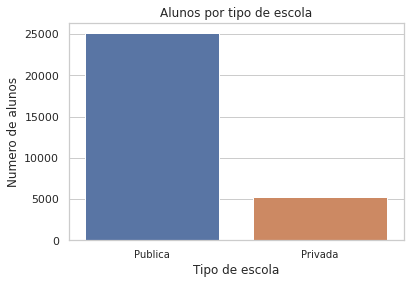

In [ ]:
# Verificando quantidade de alunos de cada tipo de escola

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dados_presentes.TP_ESCOLA.value_counts().index, y=dados_presentes.TP_ESCOLA.value_counts(), data=dados_presentes)
ax.set_title('Alunos por tipo de escola')
ax.set_ylabel('Numero de alunos')
ax.set_xlabel('Tipo de escola')
ax.set_xticklabels(['Publica','Privada', 'Exterior'], rotation='horizontal', fontsize=10)


## Comparando histograma das notas de acordo com o tipo de escola

Abaixo serão comparados os histogramas para as notas de cada prova com duas linhas verticais para demonstrar a média de cada tipo de escola. Nestes histrogramas fica evidente que em nenhuma das provas aplicadas os alunos de escolas públicas conseguiram ter uma média superior aos alunos de escola privada.


### Histograma nota da prova de Ciências da Natureza




Text(0.5, 0, 'Notas Ciências da Natureza')

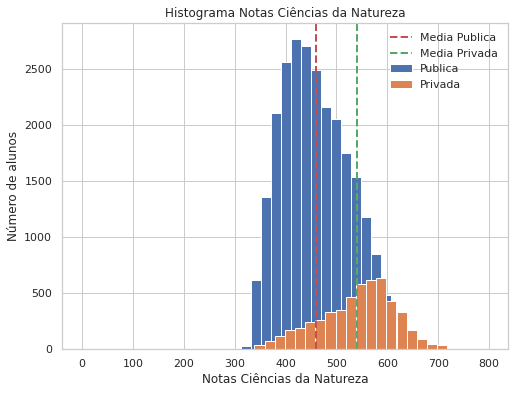

In [ ]:
dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CN"].hist(bins = 40, figsize=(8, 6))
dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CN"].hist(bins = 40, figsize=(8, 6))
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CN"].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CN"].mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend([ 'Media Publica','Media Privada','Publica','Privada'])
plt.title('Histograma Notas Ciências da Natureza')
plt.ylabel('Número de alunos')
plt.xlabel('Notas Ciências da Natureza')

### Histograma nota da prova de Ciências Humanas


Text(0.5, 0, 'Notas Ciências Humanas')

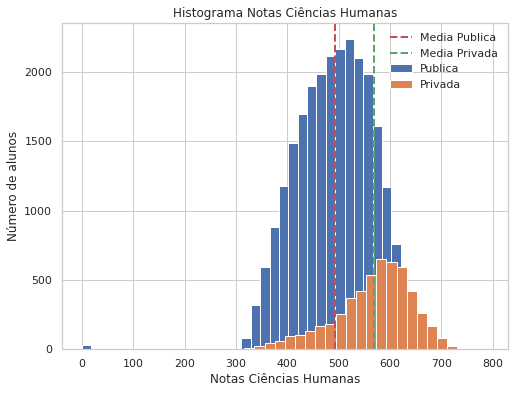

In [ ]:
dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CH"].hist(bins = 40, figsize=(8, 6))
dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CH"].hist(bins = 40, figsize=(8, 6))
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CH"].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CH"].mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend([ 'Media Publica','Media Privada','Publica','Privada'])
plt.title('Histograma Notas Ciências Humanas')
plt.ylabel('Número de alunos')
plt.xlabel('Notas Ciências Humanas')

### Histograma nota da prova de Linguagens e Códigos


Text(0.5, 0, 'Notas Linguagens e Códigos')

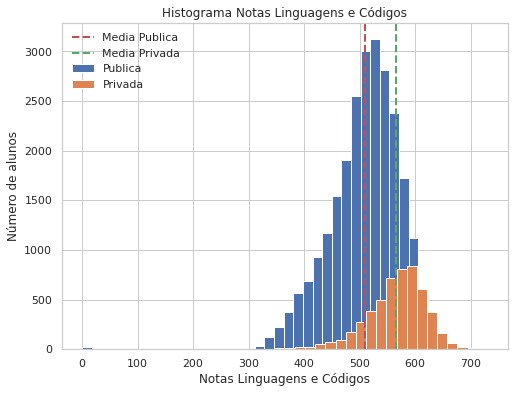

In [ ]:
dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_LC"].hist(bins = 40, figsize=(8, 6))
dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_LC"].hist(bins = 40, figsize=(8, 6))
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_LC"].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_LC"].mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend([ 'Media Publica','Media Privada','Publica','Privada'])
plt.title('Histograma Notas Linguagens e Códigos')
plt.ylabel('Número de alunos')
plt.xlabel('Notas Linguagens e Códigos')

### Histograma nota da prova de Matemática

Text(0.5, 0, 'Notas Matemática')

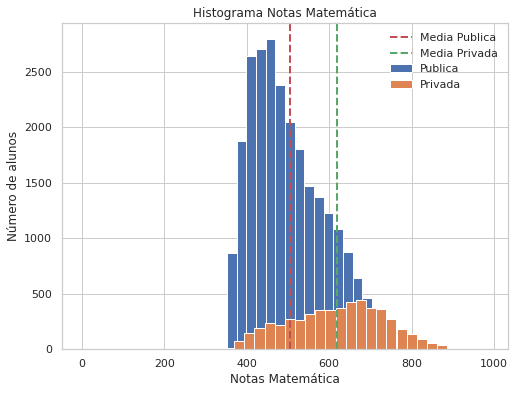

In [ ]:
dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_MT"].hist(bins = 40, figsize=(8, 6))
dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_MT"].hist(bins = 40, figsize=(8, 6))
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_MT"].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_MT"].mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend([ 'Media Publica','Media Privada','Publica','Privada'])
plt.title('Histograma Notas Matemática')
plt.ylabel('Número de alunos')
plt.xlabel('Notas Matemática')

## BoxPlot com as médias das quatro provas e redação separadas por escola pública e escola privada.

Podemos visualizar que as notas de alunos de escolas privadas são superiores em todos os quesitos apresentados pelo boxplot, a máxima a mínima e também por consequencia a média. Ainda fazendo uma análise do boxplot pode-se visualizar que a escola privada tem um número muito menor de outliers(pontos de exceção) na parte superior do boxplot, ou seja, as notas médias na região de 800 pontos são muito mais frequentes em escolas privadas do que em escolas públicas.

([<matplotlib.axis.XTick at 0x7f053747a0f0>,
 [Text(0, 0, 'Escola Publica'), Text(0, 0, 'Escola Privada')])

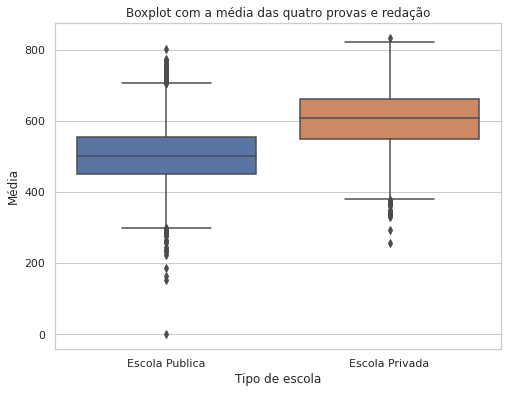

In [ ]:

dados_presentes['MEDIA_PUBLICA'] = ((dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CN"] + dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_CH"] + dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_LC"] + dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_MT"] + dados_presentes.query("TP_ESCOLA == 2")["NU_NOTA_REDACAO"]))/5
dados_presentes['MEDIA_PRIVADA'] = (dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CN"] + dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_CH"] + dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_LC"] + dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_MT"] + dados_presentes.query("TP_ESCOLA == 3")["NU_NOTA_REDACAO"])/5
provas_boxplot =['MEDIA_PUBLICA','MEDIA_PRIVADA']
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_presentes[provas_boxplot])
plt.title('Boxplot com a média das quatro provas e redação')
plt.ylabel('Média')
plt.xlabel('Tipo de escola')
plt.xticks([0,1],['Escola Publica','Escola Privada'])


## Avaliando modelos para classificação de alunos em escola pública ou privada de acordo com as suas notas




### Pré Processamento

Agora, realizamos a normalização dos dados, a fim de acelerarmos o treinamento e teste dos modelos preditivos

In [ ]:
dados_presentes.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q006,MEDIA_PUBLICA,MEDIA_PRIVADA
5,2,559.6,618.7,607.5,615.6,900.0,2,1,1,1,1,C,660.28,NaN
8,3,529.9,568.9,576.0,590.3,860.0,2,1,1,1,1,G,NaN,625.02
19,2,477.6,459.3,517.2,586.2,340.0,2,1,1,1,1,C,476.06,NaN
22,2,426.8,467.6,481.8,498.2,0.0,2,1,1,1,1,B,374.88,NaN
31,2,480.3,532.3,538.9,503.3,520.0,2,1,1,1,1,B,514.96,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
enc = LabelEncoder()
dados_classificador = dados_presentes
dados_classificador['Q006'] = enc.fit_transform(dados_classificador['Q006'])
std_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006' ]
std_features_com = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_ESCOLA' , 'Q006' ]

std = StandardScaler()
dados_classificador[std_features] = std.fit_transform(dados_classificador[std_features])
dados_classificador = dados_classificador[std_features_com]
dados_classificador.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,Q006
5,1.134326,1.403726,1.385957,0.841284,1.668874,2,-0.514415
8,0.738964,0.784319,0.893168,0.607744,1.458074,3,0.592905
19,0.042754,-0.578875,-0.026704,0.569898,-1.282325,2,-0.514415
22,-0.633488,-0.475640,-0.580504,-0.242416,-3.074124,2,-0.791245
31,0.078696,0.329092,0.312773,-0.195339,-0.333725,2,-0.791245


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    dados_classificador.drop(['TP_ESCOLA'], axis = 1), dados_classificador.TP_ESCOLA, test_size=0.2, random_state=42
)


### Classificando alunos a partir de suas notas

Para o primeiro grupo de classificadores, utilizaremos as notas dos alunos, bem como sua classe de renda no questionário sócio-econômico, para classificar se o aluno é egresso de escola pública ou privada. 

O primeiro classificador utilizado é o KNN, que agrupa ocorrências da amostra a partir de um critério de similaridade. O hiper-parâmetro mais importante desse modelo é justamente o número de núcleos a partir dos quais o modelo realizará o agrupamento. Nesse caso, utilizamos dois núcleos, seguindo a intuição de que há dois grupos distintos no *dataset*: alunos egressos de escolas públicas e privadas..

Acurácia: 0.8535661340800527
F1-score médio: 0.8305131850287487
F1-score da classe minoritária: 0.4029550033579583


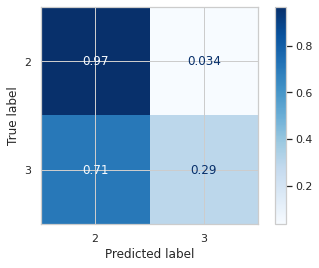

In [ ]:
# Instanciamos o modelo KNN com dois núcleos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

# Definimos uma função para treinamento e exbição dos resultados de um modelo
def pipeline_treino_teste(model):
    # Ajustamos o modelo
    model.fit(X_train, y_train)
    # Submetemos os dados de teste ao classificador 
    y_pred = model.predict(X_test)
    
    # E observamos algumas métricas de desempenho desse modelo: acurácia, F1-score e matriz de confusão
    from sklearn import metrics
    print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'F1-score médio: {metrics.f1_score(y_test, y_pred, average="weighted")}')
    print(f"F1-score da classe minoritária: {metrics.f1_score(y_test, y_pred, pos_label=3)}")
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true' )

# Definimos uma função para treinamento e exbição dos resultados de um modelo
def pipeline_treino_teste_smote(model):
    # Ajustamos o modelo
    model.fit(X_train_smote, y_train_smote)
    # Submetemos os dados de teste ao classificador 
    y_pred = model.predict(X_test)
    
    # E observamos algumas métricas de desempenho desse modelo: acurácia, F1-score e matriz de confusão
    from sklearn import metrics
    print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'F1-score médio: {metrics.f1_score(y_test, y_pred, average="weighted")}')
    print(f"F1-score da classe minoritária: {metrics.f1_score(y_test, y_pred, pos_label=3)}")
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true' )
    
    
# Agora executamos o pipeline
pipeline_treino_teste(knn)

Acurácia: 0.8718497776313622
F1-score médio: 0.8609161330004108
F1-score da classe minoritária: 0.5396449704142013


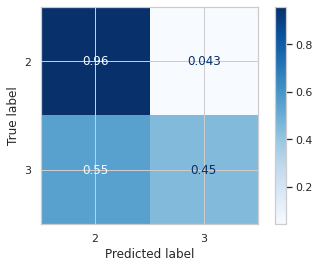

In [ ]:
# Instanciamos o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", n_estimators=300, random_state=42)

# Executamos o pipeline de treino e teste
pipeline_treino_teste(rf)

Acurácia: 0.8662493823093395
F1-score médio: 0.8550855145208397
F1-score da classe minoritária: 0.5212264150943396


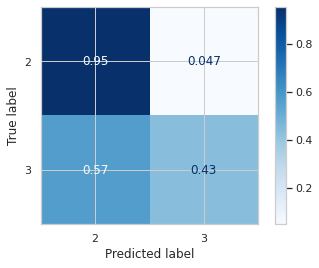

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective = 'multi:softmax',
    booster = 'gbtree',
    num_class = 2,
    eval_metric = 'logloss',
    eta = .1,
    max_depth = 14,
    colsample_bytree = .4,
    n_jobs=-1
)

pipeline_treino_teste(xgb)

### Balanceamento de classes

Apesar de uma acurácia satisfatoria dos modelos podesse visualizar que a classe de escola privada esta com um acerto muito mais baixo do que a escola pública, isso se deve ao número de amostras que é muito mais alto do que em outra, uma saída possível pode ser balancear essas classes, talvez criando amostras com SMOTE. Abaixo será avaliada essa possibilidade.

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE



In [ ]:
# Utilizando SMOTE para balancear as clasess de treino
smote = SMOTE(sampling_strategy='auto',n_jobs=2)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Acurácia: 0.8718497776313622
F1-score médio: 0.8609161330004108
F1-score da classe minoritária: 0.5396449704142013
Acurácia: 0.8487893263053863
F1-score médio: 0.8521438721164958
F1-score da classe minoritária: 0.5742115027829313


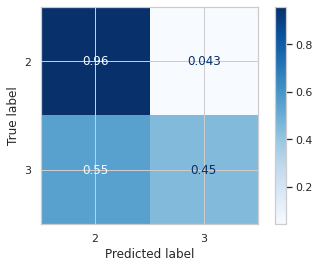

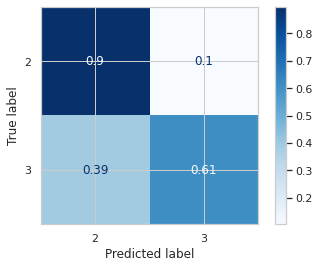

In [ ]:
# Executamos o pipeline de treino e testepara SMOTE
pipeline_treino_teste(rf)

pipeline_treino_teste_smote(rf)

## Resultados

Pode-se visualizar no desenvolvimento da análise que os alunos que concluíram o ensíno médio no ano de 2019 e que estudavam em escolas particulares e públicas tinham uma certa defassagem em nível de conhecimento quando comparadas as notas de suas provas e respectivas médias. Isso ficou mais evidente quando foram plotados os histogramas das provas esppecíficas e posteriormente reforçado pelo boxplot que também mostrou como os alunos de escolas privadas atingem notas muito boas ou excelentes com mais frequencia.

Quanto a classificação dos alunos a partir de suas notas e sua renda, obteve de certa forma um resultado satisfatório, onde foram alcançadas acurácias médias acima de 85%, claro que a classificação da classe de escolas privadas(3) deixou a desejar, pois conforme dito anteriormente devido ao número de amostras o classificador tende a classificar a maioria das amostras como se fosse da classe com maior quantidade. Foi utilizado SMOTE para o balanceamento das amostras, esse que cria amostras sintéticas para a classe com menor número de amostras, o resultado da classificação piorou, logo as amostras criadas pelo SMOTE não conseguiu representar algo próximo da realidade. 

Uma continuação para este estudo seria utilizar um maior número de amostras para a classe de escola privada buscando melhorar sua classificação, outra oportunidade seria avaliar outros fatores que possam influenciar nas notas dos alunos, algo como ter internet em casa ou outros fatores que possam ser relevantes.